Assignment 1
Question 1
You will implement linear regression as part of this question for the dataset
provided. For each sub-question, you are expected to report the following - (i) plot of the
best fit curve, (ii) equation of the best fit curve along with coefficients, (iii) value of final least
squared error over the test data and (iv) scatter plot of model output vs expected output and
for both train and test data. You can also generate a .csv file with your predictions on the
test data which we should be able to reproduce when we run your command-line instruction.
Note that you can only regress over the points in the train dataset and you are not supposed
to fit a curve on the test dataset. Whatever solution you get for the train data, you have to
use that to make predictions on the test data and report results.

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import time
#Generate Csv files
def GenerateCSV(x,y,Filename):
   
    header = ['x', 'y']
    itr=0
  
    with open('CSV\\'+Filename+'Results_'+time.strftime("%Y%m%d-%H%M%S")+'.csv', 'w', encoding='UTF8') as f:
        writer = csv.writer(f)
        # write the header
        writer.writerow(header)
        # write the data
        for i in x:
            writer.writerow([x[itr], y[itr]])
            itr=itr+1
#Use formula w=inverse(x^t.x).x.y
def CalculateW(x,y):
    tmpCal=np.dot(x.T,x)
    tmpCal=np.linalg.inv(tmpCal)
    tmpCal1=np.dot(x.T,y)
    tmpCal=np.dot(tmpCal,tmpCal1)
    return tmpCal

#calculate mean squared error
#formula =1/n * summation (yi-w^Txi)^2
def CalculateMeanSquaredError(x,y,w):
    size=x.shape[0]
    yi=np.dot(w,x.T)
    diff=np.subtract(y,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError

#Predict the output label using the model
# yi=w^Tx
def PredictorFunc(w,x):
    tmpY=0
    sizew=w.shape[0]-1
    itr=0
    while sizew>= 0:
        tmpY=tmpY+w[sizew]*(x**sizew)
        sizew=sizew-1
        
    return tmpY

def polynomialFunc(w):
    function=""
    sizew=w.shape[0]-1
    
    itr=0
    while sizew>= 0:
        function=function+"+("+str(w[sizew])+")(x^"+str(sizew)+")"
        sizew=sizew-1
    function.strip('+')  
    return function[1:]


#plot scatter curve to show predicted and actual result
def plotPredictedAndActualResult(w,x_data,y_data,degree,error,title,FileName):
    
    plt.title(title)
    plt.scatter(x_data,y_data,s=20,c='blue',label ='Actual Result')
    y=np.array([PredictorFunc(w,x) for x in x_data])   
    plt.text(4, 5, 'Squared Error in Test data: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.scatter(x_data,y,s=20,c='red',label = 'Predicted Result')
    plt.legend( loc ="lower left")
    GenerateCSV(x_data,y,FileName)
#Plot curve
def plotCurve(w,x_train,y_train,degree,error):

    #Plot a curve to fit training data
    plt.figure()
    plt.scatter(x_train,y_train,s=2,c='blue')
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    predict_y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Plotting on Training data')
    plt.text(4, 5, 'Squared Error: '+ str('%.3f' % error), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, predict_y, '-r')
    
  
    
 #Plot curve for test data
def plotCurveOnTestData(w,x_test,y_test,degree,title,FileName):
    error=CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    
    plt.figure()
    plotPredictedAndActualResult(w,x_test,y_test,degree,error,title,FileName)
    
 #Plot curve for Ridge Regression
def plotCurveForRidgeRegression(w,x_train,y_train,x_test,y_test,degree,lamda,title,FileName):
    error=CalculateMeanSquaredErrorTestData(x_train,y_train,w)
    plt.figure()
    modelXAxis=np.arange(start=0, stop=10, step=.1)
    
    y=np.array([PredictorFunc(w,x) for x in modelXAxis])
    plt.title('Ridge regression on training data')
    plt.scatter(x_train,y_train,s=10,c='blue')
    plt.text(4, 5, 'λ: '+ str('%.3f' % lamda), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    
    
    plt.text(5,1, 'Degree: '+ str(degree), style='italic', bbox={
        'facecolor': 'grey', 'alpha': 0.1, 'pad': 2})
    plt.plot(modelXAxis, y, '-r')
    error=CalculateMeanSquaredErrorTestData(x_test,y_test,w)
    plt.figure()
    plotPredictedAndActualResult(w,x_test,y_test,degree,error,title,FileName)
      
#mean squared error for test data    
def CalculateMeanSquaredErrorTestData(x_test,y_test,w):
    size=x_test.shape[0]
   
    yi=np.array([PredictorFunc(w,x) for x in x_test])
    diff=np.subtract(y_test,yi)
    sqrError=(1/size)*np.dot(diff.T,diff)
    return sqrError


def ReadData():
    train_Data=pd.read_csv("linear_reg_train_data.csv")
    test_Data=pd.read_csv("linear_reg_test_data.csv")
   
   # Split training data into two part .Use few portion as train data other half to validate model
  
    train_Data_partTraining = train_Data[:int(len(train_Data)*0.85)]
    train_Data_partTesting = train_Data[int(len(train_Data)*0.85):]
    x_train=train_Data_partTraining['x']
    y_train=train_Data_partTraining['y']
    x_train_Validate=train_Data_partTesting['x']
    y_train_Validate=train_Data_partTesting['y']
    x_test=test_Data['x']
    y_test=test_Data['y']
    size=x_train.shape[0]
    return train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_Validate,y_train_Validate
    

#Algorithm for ridge regression
#W = (xᵗx + λI)-¹ xᵗY
#cost function 1/n{(Y - W^Tx)ᵗ(Y - W^Tx)} + λ Δ{WᵗW}
def  ridgeRegression(w_input,x_train,y_train,x_validate,y_validate):
    size=x_train.shape[0]
   # x=np.ones((size,1))
    Max_Iteration=500
    lamda=0
    itr=0
    finalLamda=0
    error=10000
    W=None
    
    while itr<Max_Iteration:
        lamda=lamda+.01
        itr=itr+1
        tmpCostFunc=np.dot(w_input,x_train.T)
        tmpCostFunc=np.subtract(y_train,tmpCostFunc)
        tmpCostFunc=np.dot(tmpCostFunc.T,tmpCostFunc)
        tmpCostFunc=(1/size)*tmpCostFunc
        Regularizer=lamda*np.dot(w_input.T,w_input)
        error=np.add(tmpCostFunc,Regularizer)
        
        
        #tmpW=np.dot(x_train,x_train.T)
        #size=tmpW.shape[0]
        #tmpW=np.add(tmpW,lamda*np.identity(size))
        #tmpW=np.linalg.inv(tmpW)        
        #tmpW=np.dot(tmpW,x_train)
        #tmpW=np.dot(tmpW.T,y_train)
        #newError=CalculateMeanSquaredErrorTestData(x_validate,y_validate,tmpW)
        
        if(newerror<error):
            error=newerror
            finalLamda=lamda
    return finalLamda
#cost function in ridge regression
#cost function 1/n{(Y - W^Tx)ᵗ(Y - W^Tx)} + λ Δ{WᵗW}
def  CostFunction(l,x_validate,y_validate,w_input):
    size=x_validate.shape[0]
    # yi=w^Tx
    yi=np.array([PredictorFunc(w,x) for x in x_validate])
   # x=np.ones((size,1))
    tmpCostFunc=np.subtract(y_validate,yi)
    tmpCostFunc=np.dot(tmpCostFunc.T,tmpCostFunc)
    tmpCostFunc=(1/size)*tmpCostFunc
    Regularizer=l*np.dot(w_input.T,w_input)
    error=np.add(tmpCostFunc,Regularizer)
    return error
        


a)Use standard linear regression to get the best fit curve. Vary the maximum
degree term of the polynomial to arrive upon an optimal solution.

.................................
Observations
.................................
 Degree Polynomial:3
 Function:(0.11484336660950079)(x^3)+(-1.738321215543296)(x^2)+(6.077339140739113)(x^1)+(-1.0068865047046138)(x^0)
.................................


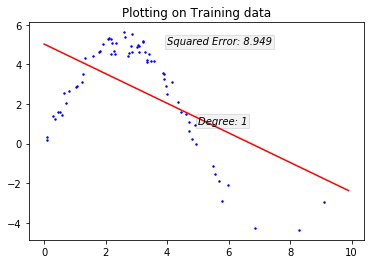

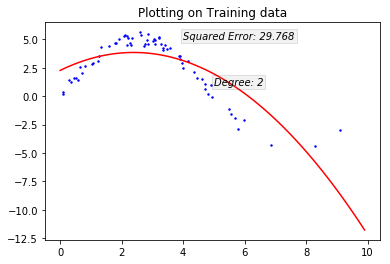

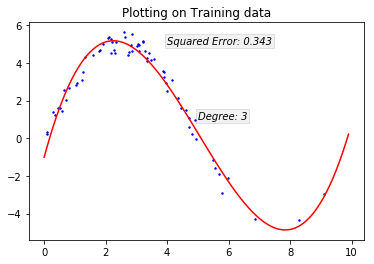

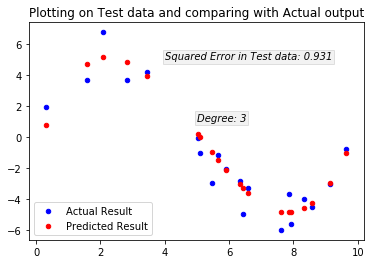

In [152]:


#Question 1.(a)
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_validate,y_train_validate=ReadData()
#Read data for x
size=x_train.shape[0]
x=np.ones((size,1))

#read data for Y
train_y=np.array(y_train)

MAX_DEGREE=size
degree=1;
oldError=100
w=None
testerror=None
while degree<MAX_DEGREE:
    x1=np.array(x_train)**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    w=CalculateW(x,y_train)
 
    newerror=CalculateMeanSquaredError(x,train_y,w)
    testerror= CalculateMeanSquaredErrorTestData(x_train_validate,y_train_validate,w)
    
    #If performance of model degrades come out of the loop
    #Also consider a model as good if error in test data less then 1
    plotCurve(w,x_train,y_train,degree,testerror) 
    if( testerror<=.5 ):       
       
        break;
    
    degree=degree+1
   #Finally perfom prediction 
print('.................................')
print('Observations')
print('.................................')
print(' Degree Polynomial:'+str(degree))
print(' Function:'+polynomialFunc(w))
print('.................................')
GenerateCsv=True
plotCurveOnTestData(w,x_test,y_test,degree,'Plotting on Test data and comparing with Actual output','Question_a_') 



b)In the above problem, increase the maximum degree of the polynomial such that
the curve overfits the data.
c)Use ridge regression to reduce the overfit in the previous question, vary the
value of lambda (λ) to arrive at the optimal value. Report the optimal λ along with other
deliverables previously mentioned.

.................................
Observations For Over Fitting
.................................
 Degree Polynomial:8
 Function:(-1.1346860034677775e-05)(x^8)+(0.0005195099786305946)(x^7)+(-0.009446652518818155)(x^6)+(0.0851256055466365)(x^5)+(-0.37899421935435385)(x^4)+(0.7426542397588491)(x^3)+(-1.1616983879357576)(x^2)+(3.7191407604841515)(x^1)+(0.002332456424483098)(x^0)
.................................
.................................
Observations After Using Ridge Regression
.................................
 lambda (λ):4.999999999999938
 Degree Polynomial:5
 Function:(-0.0032180123966734087)(x^5)+(0.07791769138779614)(x^4)+(-0.5580087123324233)(x^3)+(0.7318227038515488)(x^2)+(2.5498400367569047)(x^1)+(0.19087607804749496)(x^0)
.................................


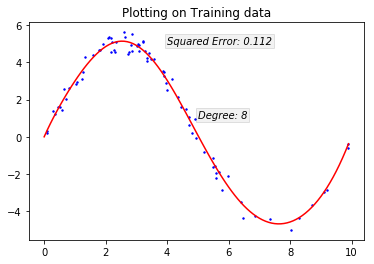

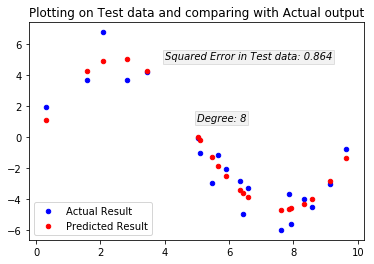

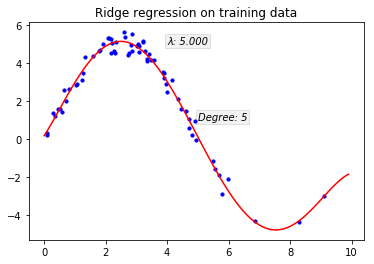

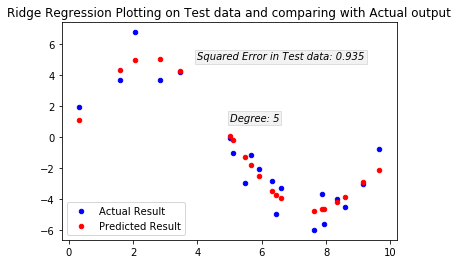

In [153]:

#Question 1.(b) (c)
#Read  data
train_Data,test_Data,x_train,y_train,x_test,y_test,size,x_train_validate,y_train_validate=ReadData()


#Read data for x
x=np.ones((size,1))


#read data for Y
train_y=np.array(y_train)

MAX_DEGREE=size

degree=1;
SquaredError=100
w_calculated=None
degree_Polynomial=1;
Overfit_X=None
while degree<100:
    x1=np.array(x_train)**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    

    w=CalculateW(x,y_train)
    #calculate mean squared error of the train data
    testerror= CalculateMeanSquaredErrorTestData(x_train_validate,y_train_validate,w)
    
    #In each iteration consider a function which generated least error in training data
    if(SquaredError>testerror  ):
       
        w_calculated=w
        degree_Polynomial=degree
        #storing the X
        Overfit_X=x
        SquaredError=testerror
      
    degree=degree+1
#plot over fitting curve
plotCurve(w_calculated,train_Data['x'],train_Data['y'],degree_Polynomial,SquaredError) 

plotCurveOnTestData(w_calculated,x_test,y_test,degree_Polynomial,'Plotting on Test data and comparing with Actual output','Question_b_')  
print('.................................')
print('Observations For Over Fitting')
print('.................................')
print(' Degree Polynomial:'+str(degree_Polynomial))
print(' Function:'+polynomialFunc(w_calculated))
print('.................................')

#Use ridge regression
Lambda=ridgeRegression(w_calculated,Overfit_X,y_train,x_train_validate,y_train_validate)
x=np.ones((size,1))
train_y=np.array(y_train)
degree=1
degree_Polynomial=1;
CostFuncFinal=10000
while degree<100:
    x1=np.array(x_train)**degree
    x= np.concatenate((x,np.reshape(x1,(x1.shape[0],1))),axis=1)
    

    w=CalculateW(x,y_train)
    
    #calculate mean squared error of the train data
    CostFunctionResult= CostFunction(Lambda,x_train_validate,y_train_validate,w)
    
    #In each iteration consider a function which generated least error in training data
    if(CostFunctionResult<CostFuncFinal  ):
       
        w_calculated=w
        degree_Polynomial=degree
        #storing the X
        Overfit_X=x
        CostFuncFinal=CostFunctionResult
      
    degree=degree+1

print('.................................')
print('Observations After Using Ridge Regression')
print('.................................')
print(' lambda (λ):'+str(Lambda))
print(' Degree Polynomial:'+str(degree_Polynomial))
print(' Function:'+polynomialFunc(w_calculated))
print('.................................')

#use the lambda (λ) to get a best w for all data  
plotCurveForRidgeRegression(w_calculated,x_train,y_train,x_test,y_test,degree_Polynomial,Lambda,
                            'Ridge Regression Plotting on Test data and comparing with Actual output','Question_c_') 
